In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's start by reading the data

In [2]:
loan_data = pd.read_csv('LoanStats3a.csv', low_memory=False)

In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(86), object(25)
memory usage: 36.0+ MB


Count the number of columns with only 1 or 0 values. 

In [4]:
count = 0
for column in loan_data:
    if(loan_data[column].nunique() < 2):
        count +=1
print count

60


Drop all the columns with less than 2 unique values.

In [5]:
loan_data = loan_data.dropna(thresh=2, axis=1)

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 57 columns):
id                            42538 non-null object
member_id                     42535 non-null float64
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39911 non-null object
emp_length                    42535 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
p

In [7]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'Late (16-30 days)', 'In Grace Period', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'], dtype=object)

In [8]:
loan_data['loan_status'].value_counts()

Fully Paid                                             34108
Charged Off                                             5662
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        10
Current                                                    3
In Grace Period                                            1
Late (16-30 days)                                          1
Default                                                    1
Name: loan_status, dtype: int64

I do not have a lot of context around the loan data so I erred on the side of including more data. I selected the following columns after going through all the columns.
loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, annual_inc, verification_status, loan_status, dti, delinq_2yrs, inq_last_6mths, open_acc, revol_util, total_pymnt_inv, pub_rec_bankruptcies


In [9]:
loan_data = loan_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'verification_status', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_util', 'total_pymnt_inv', 'pub_rec_bankruptcies']]

In [10]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'Late (16-30 days)', 'In Grace Period', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'], dtype=object)

We are interested in either fully paid loans or the defaulted loans. Selecting rows with only those values.

In [11]:
loan_data = loan_data[(loan_data['loan_status'] == 'Fully Paid') | (loan_data['loan_status'] == 'Charged Off')]

Dropping all the empty rows. 

In [12]:
loan_data = loan_data.dropna()

In [13]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39023 entries, 0 to 39749
Data columns (total 16 columns):
loan_amnt               39023 non-null float64
funded_amnt             39023 non-null float64
funded_amnt_inv         39023 non-null float64
term                    39023 non-null object
int_rate                39023 non-null object
installment             39023 non-null float64
annual_inc              39023 non-null float64
verification_status     39023 non-null object
loan_status             39023 non-null object
dti                     39023 non-null float64
delinq_2yrs             39023 non-null float64
inq_last_6mths          39023 non-null float64
open_acc                39023 non-null float64
revol_util              39023 non-null object
total_pymnt_inv         39023 non-null float64
pub_rec_bankruptcies    39023 non-null float64
dtypes: float64(11), object(5)
memory usage: 5.1+ MB


In [14]:
loan_data['term'] = loan_data['term'].apply(lambda x: float(x.split()[0]))

In [15]:
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: float(x[:-1]))

In [16]:
loan_data['revol_util'] = loan_data['revol_util'].apply(lambda x: float(x[:-1]))

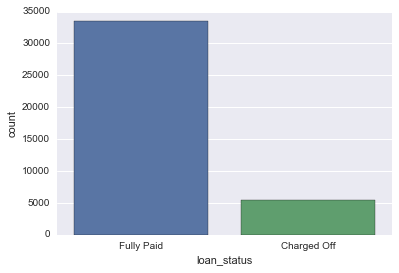

In [17]:
sns.countplot(x='loan_status', data=loan_data)

Let's do a lmplot across multiple attributes to see if there is a relationship between different attributes. 

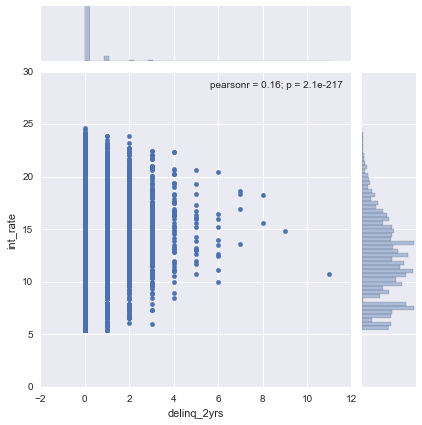

In [18]:
sns.jointplot(x='delinq_2yrs',y='int_rate',data=loan_data)

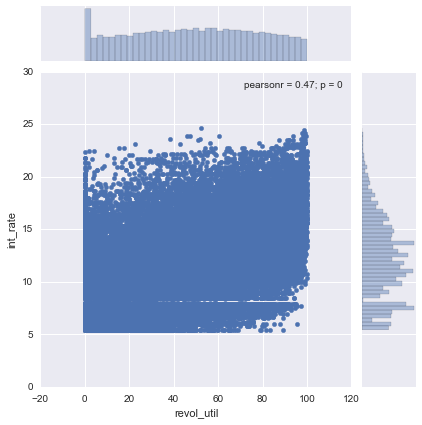

In [19]:
sns.jointplot(x='revol_util',y='int_rate',data=loan_data)

In [20]:
loan_data['term'].head()

0    36.0
1    60.0
2    36.0
3    36.0
4    60.0
Name: term, dtype: float64

In [21]:
loan_data['verification_status'].unique()


array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

verification_status and loan_status are categorical values. We'll convert them to numerical values using one hot encoding. 

In [22]:
verification_status = pd.get_dummies(loan_data['verification_status'], drop_first=True)
loan_status = pd.get_dummies(loan_data['loan_status'], drop_first=True)

In [23]:
loan_data.drop(['verification_status', 'loan_status'], axis = 1, inplace=True)

In [24]:
loan_data = pd.concat([loan_data, verification_status, loan_status], axis =1)

In [25]:
loan_data.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_util,total_pymnt_inv,pub_rec_bankruptcies,Source Verified,Verified,Fully Paid
0,5000.0,5000.0,4975.0,36.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,83.7,5833.84,0.0,0.0,1.0,1.0
1,2500.0,2500.0,2500.0,60.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,9.4,1014.53,0.0,1.0,0.0,0.0
2,2400.0,2400.0,2400.0,36.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,98.5,3005.67,0.0,0.0,0.0,1.0
3,10000.0,10000.0,10000.0,36.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,21.0,12231.89,0.0,1.0,0.0,1.0
4,3000.0,3000.0,3000.0,60.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,53.9,4066.91,0.0,1.0,0.0,1.0
5,5000.0,5000.0,5000.0,36.0,7.90,156.46,36000.0,11.20,0.0,3.0,9.0,28.3,5632.21,0.0,1.0,0.0,1.0
6,7000.0,7000.0,7000.0,60.0,15.96,170.08,47004.0,23.51,0.0,1.0,7.0,85.6,10137.84,0.0,0.0,0.0,1.0
7,3000.0,3000.0,3000.0,36.0,18.64,109.43,48000.0,5.35,0.0,2.0,4.0,87.5,3939.14,0.0,1.0,0.0,1.0
8,5600.0,5600.0,5600.0,60.0,21.28,152.39,40000.0,5.55,0.0,2.0,11.0,32.6,647.50,0.0,1.0,0.0,0.0
9,5375.0,5375.0,5350.0,60.0,12.69,121.45,15000.0,18.08,0.0,0.0,2.0,36.5,1477.70,0.0,0.0,1.0,0.0


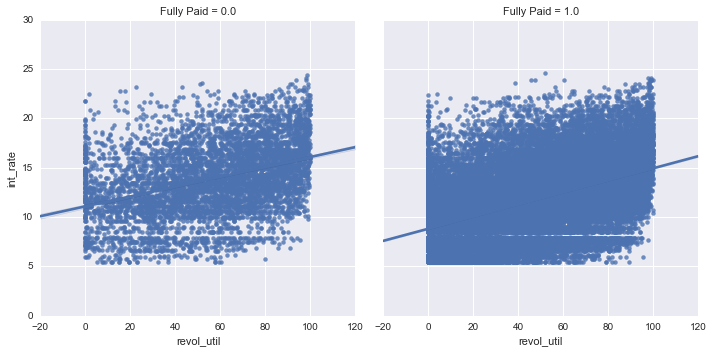

In [26]:
sns.lmplot(x='revol_util',y='int_rate', data=loan_data, col='Fully Paid')

In [27]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39023 entries, 0 to 39749
Data columns (total 17 columns):
loan_amnt               39023 non-null float64
funded_amnt             39023 non-null float64
funded_amnt_inv         39023 non-null float64
term                    39023 non-null float64
int_rate                39023 non-null float64
installment             39023 non-null float64
annual_inc              39023 non-null float64
dti                     39023 non-null float64
delinq_2yrs             39023 non-null float64
inq_last_6mths          39023 non-null float64
open_acc                39023 non-null float64
revol_util              39023 non-null float64
total_pymnt_inv         39023 non-null float64
pub_rec_bankruptcies    39023 non-null float64
Source Verified         39023 non-null float64
Verified                39023 non-null float64
Fully Paid              39023 non-null float64
dtypes: float64(17)
memory usage: 5.4 MB


In [28]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_util,total_pymnt_inv,pub_rec_bankruptcies,Source Verified,Verified,Fully Paid
count,39023.000000,39023.000000,39023.000000,39023.000000,39023.000000,39023.000000,3.902300e+04,39023.000000,39023.00000,39023.000000,39023.000000,39023.000000,39023.000000,39023.000000,39023.000000,39023.000000,39023.000000
mean,11259.748097,10984.679548,10559.036469,42.562899,12.046209,324.956089,6.899929e+04,13.366081,0.14553,0.866540,9.298132,48.973526,11811.405997,0.043308,0.256234,0.328652,0.858340
std,7478.951411,7206.436232,7110.053430,10.697704,3.744015,208.910806,6.312983e+04,6.668654,0.49014,1.067322,4.380918,28.310206,9056.647014,0.204431,0.436558,0.469729,0.348706
min,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,4.000000e+03,0.000000,0.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5462.500000,5000.000000,36.000000,9.250000,167.340000,4.080000e+04,8.240000,0.00000,0.000000,6.000000,25.550000,5313.715000,0.000000,0.000000,0.000000,1.000000
50%,10000.000000,9750.000000,9000.000000,36.000000,11.860000,280.620000,5.919600e+04,13.450000,0.00000,1.000000,9.000000,49.500000,9497.090000,0.000000,0.000000,0.000000,1.000000
75%,15000.000000,15000.000000,14500.000000,60.000000,14.610000,431.200000,8.250000e+04,18.635000,0.00000,1.000000,12.000000,72.500000,16072.365000,0.000000,1.000000,1.000000,1.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.00000,8.000000,44.000000,99.900000,58563.680000,2.000000,1.000000,1.000000,1.000000


In [31]:
from sklearn.cross_validation import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(loan_data.drop('Fully Paid',axis=1), 
                                                    loan_data['Fully Paid'], test_size=0.3, 
                                                    random_state=101)

In [119]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_util,total_pymnt_inv,pub_rec_bankruptcies,Source Verified,Verified
11150,3600.0,3600.0,3350.0,36.0,10.99,117.85,94438.0,13.00,0.0,0.0,6.0,34.5,3176.16,0.0,1.0,0.0
32444,4000.0,4000.0,3975.0,36.0,11.36,131.65,55200.0,16.13,1.0,0.0,9.0,48.1,4709.82,0.0,0.0,0.0
20380,10000.0,10000.0,10000.0,36.0,13.06,337.23,84000.0,18.99,1.0,2.0,8.0,2.2,2410.01,0.0,0.0,1.0
2036,33000.0,33000.0,33000.0,36.0,18.64,1203.66,115000.0,7.11,1.0,0.0,12.0,48.3,36040.93,0.0,1.0,0.0
8915,10000.0,10000.0,9950.0,36.0,9.99,322.63,38004.0,22.45,0.0,1.0,13.0,42.5,11556.40,0.0,0.0,1.0


In [121]:
y_train.value_counts()

1.0    23358
0.0     3958
Name: Fully Paid, dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
predictions = logmodel.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.98      0.76      0.86      1570
        1.0       0.96      1.00      0.98     10137

avg / total       0.97      0.97      0.96     11707



In [38]:
from sklearn.tree import DecisionTreeClassifier 

In [39]:
dtree = DecisionTreeClassifier()

In [40]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [41]:
predictions = dtree.predict(X_test)

In [42]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.83      0.84      0.84      1570
        1.0       0.98      0.97      0.97     10137

avg / total       0.96      0.96      0.96     11707



In [43]:
from sklearn import svm

In [44]:
lin_svc = svm.LinearSVC(random_state=101)

In [45]:
lin_svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=101, tol=0.0001,
     verbose=0)

In [46]:
predictions = lin_svc.predict(X_test)

In [47]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.87      0.84      0.85      1570
        1.0       0.98      0.98      0.98     10137

avg / total       0.96      0.96      0.96     11707



In [48]:
confusion_matrix(y_test,predictions)

array([[1316,  254],
       [ 205, 9932]])

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier(n_estimators=200)

In [51]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
predictions = rfc.predict(X_test)

In [53]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.99      0.77      0.87      1570
        1.0       0.97      1.00      0.98     10137

avg / total       0.97      0.97      0.97     11707



In [54]:
confusion_matrix(y_test,predictions)

array([[ 1204,   366],
       [    8, 10129]])

In [116]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import tree
import pydot
import StringIO
from os import system
import collections

Let's investigate how the depth of decision tree classifer affect the performance. I'll start the depth from 1 and go all the way to 30. I'll then see how does the classifier perform with different depths. I also generate dot files to visualise the decision tree.I generate the dotfile using graphviz library and then use http://webgraphviz.com/ to generate the graph from the dotfile. 

{1: 0.92812671671854974, 2: 0.94661622530474998, 3: 0.94722967565786376, 4: 0.96275862068965512, 5: 0.96580380170025804, 6: 0.97037575757575756, 7: 0.97748884145158166, 8: 0.97921119098503995, 9: 0.97926401869158874, 10: 0.98087364868170035, 11: 0.97980590138221746, 12: 0.97845821679179557, 13: 0.97853529151726515, 14: 0.97762038266686335, 15: 0.97640742747377229, 16: 0.97549913729356663, 17: 0.9752970760810612, 18: 0.97499630122799241, 19: 0.97397145256087325, 20: 0.97537869442936798, 21: 0.97448047781233038, 22: 0.97452858130121445, 23: 0.97418176432838044, 24: 0.9735763322961426, 25: 0.9739207744739703, 26: 0.97362441963844704, 27: 0.97372060857538045, 28: 0.97372060857538045, 29: 0.97372060857538045}

 Text 

{1: 0.86589220124711708, 2: 0.89888238424693989, 3: 0.90590671708986137, 4: 0.92955547391623805, 5: 0.93611702620127768, 6: 0.95413806254767353, 7: 0.96171837708830554, 8: 0.9645010046885466, 9: 0.96656096857884122, 10: 0.97283136037259854, 11: 0.97369702873843156, 12: 0.97344

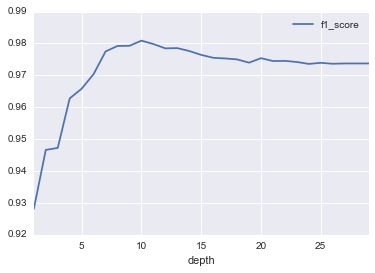

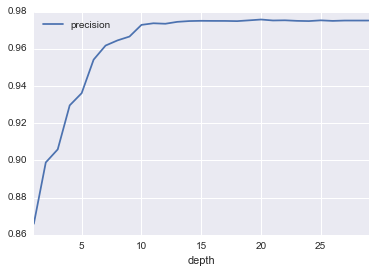

In [108]:
dtree_depth_f1score_map = {}
dtree_depth_precision_map = {}
for depth in range(1,30):
    dtree = DecisionTreeClassifier(random_state=101, max_depth= depth)    
    dtree.fit(X_train,y_train)
    
    filename = "D:/capstone_plot_images/depth_" + str(depth)
    dotfile = open(filename, 'w')    
    tree.export_graphviz(dtree, out_file = dotfile, feature_names = X_test.columns)
    dotfile.close()    
    
    predictions = dtree.predict(X_test)    
    dtree_depth_f1score_map[depth] = f1_score(y_test,predictions)
    dtree_depth_precision_map[depth] = precision_score(y_test,predictions)
depth_f1score = pd.DataFrame(dtree_depth_f1score_map.items(), columns=['depth', 'f1_score'])
depth_precision = pd.DataFrame(dtree_depth_precision_map.items(), columns = ['depth', 'precision'])
print dtree_depth_f1score_map
print "\n Text \n"
print dtree_depth_precision_map
depth_f1score.plot(x='depth', y='f1_score')
depth_precision.plot(x='depth', y='precision')
    

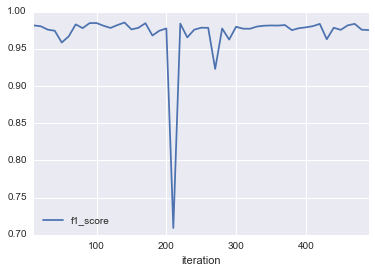

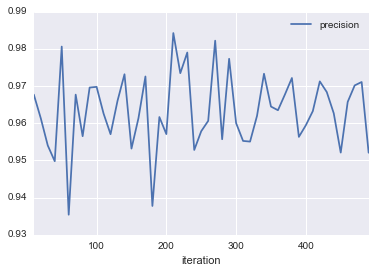

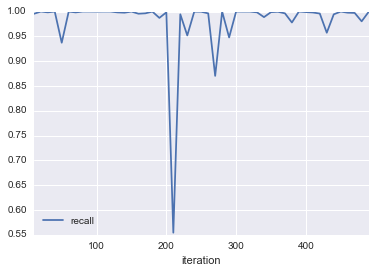

In [118]:
linearSVC_depth_f1score_map = collections.OrderedDict()
linearSVC_depth_precision_map =  collections.OrderedDict()
linearSVC_depth_recall_map = collections.OrderedDict()
for maxiteration in range(10, 500, 10):
    #print maxiteration
    lin_svc = svm.LinearSVC(random_state=101, max_iter= maxiteration)    
    lin_svc.fit(X_train,y_train)
    
    predictions = lin_svc.predict(X_test)    
    linearSVC_depth_f1score_map[maxiteration] = f1_score(y_test,predictions)
    linearSVC_depth_precision_map[maxiteration] = precision_score(y_test,predictions)
    linearSVC_depth_recall_map[maxiteration] = recall_score(y_test, predictions)
maxiteration_f1score = pd.DataFrame(linearSVC_depth_f1score_map.items(), columns=['iteration', 'f1_score'])
maxiteration_precision = pd.DataFrame(linearSVC_depth_precision_map.items(), columns = ['iteration', 'precision'])
maxiteration_recall = pd.DataFrame(linearSVC_depth_recall_map.items(), columns = ['iteration', 'recall'])
#print linearSVC_depth_f1score_map
#print "\n Text \n"
#print linearSVC_depth_precision_map
maxiteration_f1score.plot(x='iteration', y='f1_score')
maxiteration_precision.plot(x='iteration', y='precision')
maxiteration_recall.plot(x='iteration', y='recall')